## Imports and Hyperparametrs 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets , transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device:{DEVICE}")

lr = 0.0002
b1 = 0.5
batch_size = 128
z_dim = 100
epochs = 50
sample_size = 128

Device:cuda


## Data Loading & Preprocessing

In [4]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5),(0.5))
    ]
)

dataset =  datasets.MNIST(root = "dataset/" , transform=transform , download =  True)
loader =  DataLoader(dataset, batch_size = batch_size , shuffle = True)

## Generator

In [5]:
class Generator (nn.Module):
    def __init__(self,z_dim):
        super(Generator,self).__init__()
        self.gen = nn.Sequential(
            nn.ConvTranspose2d(z_dim,256,7,1,0,bias = False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256,128,4,2,1,bias = False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128,1,4,2,1,bias = False),
            nn.Tanh()
        )

    def forward(self,x):
        return self.gen(x)

## Discriminator 

In [6]:
class Discriminator (nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.disc = nn.Sequential(
            nn.Conv2d(1,64,4,2,1,bias = False),
            nn.LeakyReLU(0.2,inplace = True),

            nn.Conv2d(64,128,4,2,1,bias = False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2,inplace = True),

            nn.Conv2d(128,1,7,1,0,bias = False),
            nn.Sigmoid()
        )

    def forward(self,x):
        return self.disc(x)

## Initialization & Optimizers 

In [7]:
gen = Generator(z_dim).to(DEVICE)
disc = Discriminator().to(DEVICE)

opt_gen = optim.Adam(gen.parameters(),lr=lr,betas = (b1,0.999))
opt_disc = optim.Adam(disc.parameters(),lr=lr,betas = (b1,0.999))
criterion = nn.BCELoss()

fixed_noise = torch.randn(sample_size , z_dim ,1,1).to(DEVICE)

## Training Loop

In [11]:
import torchvision
import numpy as np

Epoch [1/50]  Loss D: 0.3461 , loss G: 1.5365


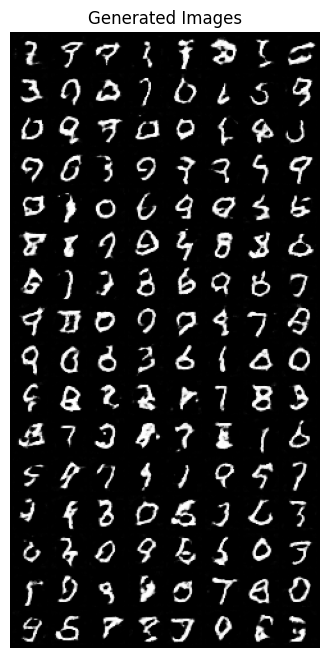

Epoch [2/50]  Loss D: 0.3965 , loss G: 3.0370
Epoch [3/50]  Loss D: 0.2703 , loss G: 1.8569
Epoch [4/50]  Loss D: 0.3407 , loss G: 1.9314
Epoch [5/50]  Loss D: 0.3034 , loss G: 1.6089
Epoch [6/50]  Loss D: 0.2751 , loss G: 2.0806
Epoch [7/50]  Loss D: 0.4189 , loss G: 2.8212
Epoch [8/50]  Loss D: 0.4010 , loss G: 1.4831
Epoch [9/50]  Loss D: 0.2748 , loss G: 1.3131
Epoch [10/50]  Loss D: 0.3596 , loss G: 2.6405
Epoch [11/50]  Loss D: 0.4002 , loss G: 2.0385


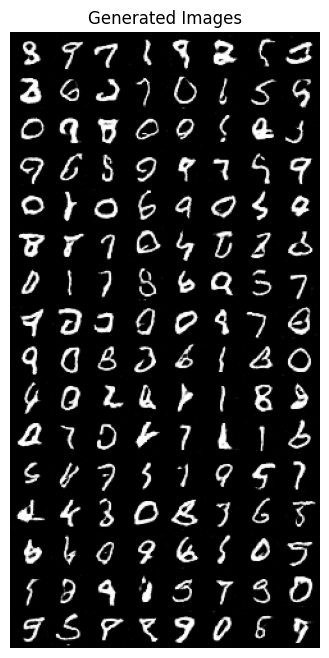

Epoch [12/50]  Loss D: 0.4156 , loss G: 2.2614
Epoch [13/50]  Loss D: 0.3948 , loss G: 1.7178
Epoch [14/50]  Loss D: 0.4122 , loss G: 0.7366
Epoch [15/50]  Loss D: 0.4775 , loss G: 3.2343
Epoch [16/50]  Loss D: 0.2284 , loss G: 2.8990
Epoch [17/50]  Loss D: 0.2771 , loss G: 1.7227
Epoch [18/50]  Loss D: 0.4036 , loss G: 1.6658
Epoch [19/50]  Loss D: 0.3010 , loss G: 1.6325
Epoch [20/50]  Loss D: 0.6020 , loss G: 2.9471
Epoch [21/50]  Loss D: 0.3753 , loss G: 2.6568


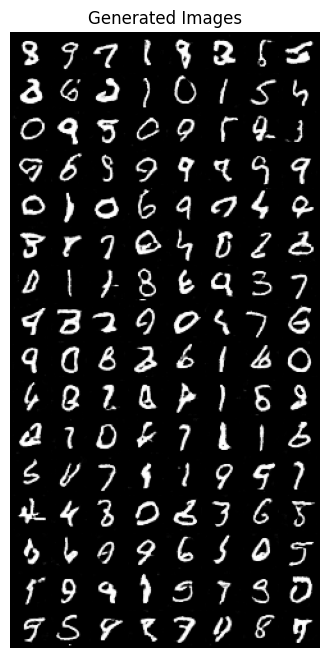

Epoch [22/50]  Loss D: 0.4725 , loss G: 0.6842
Epoch [23/50]  Loss D: 0.3359 , loss G: 1.4574
Epoch [24/50]  Loss D: 0.3402 , loss G: 1.3775
Epoch [25/50]  Loss D: 0.4024 , loss G: 2.7886
Epoch [26/50]  Loss D: 0.2665 , loss G: 2.3988
Epoch [27/50]  Loss D: 0.3396 , loss G: 2.1063
Epoch [28/50]  Loss D: 0.3066 , loss G: 2.3962
Epoch [29/50]  Loss D: 0.2972 , loss G: 2.0797
Epoch [30/50]  Loss D: 0.2201 , loss G: 2.0637
Epoch [31/50]  Loss D: 0.2937 , loss G: 1.2837


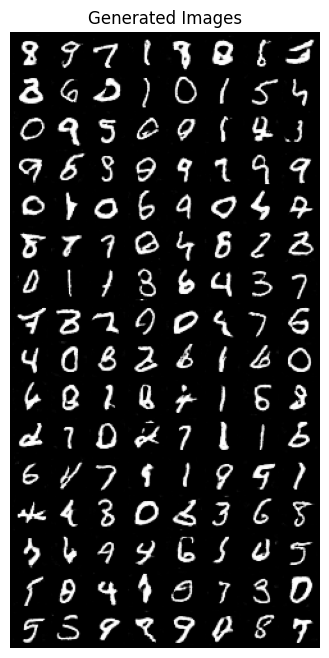

Epoch [32/50]  Loss D: 0.2984 , loss G: 2.9715
Epoch [33/50]  Loss D: 0.2439 , loss G: 2.1304
Epoch [34/50]  Loss D: 0.3120 , loss G: 1.4276
Epoch [35/50]  Loss D: 0.3722 , loss G: 2.4369
Epoch [36/50]  Loss D: 0.3620 , loss G: 1.2547
Epoch [37/50]  Loss D: 0.2813 , loss G: 1.8070
Epoch [38/50]  Loss D: 0.2912 , loss G: 1.5871
Epoch [39/50]  Loss D: 0.2829 , loss G: 2.1977
Epoch [40/50]  Loss D: 0.2573 , loss G: 2.0743
Epoch [41/50]  Loss D: 0.4051 , loss G: 1.1629


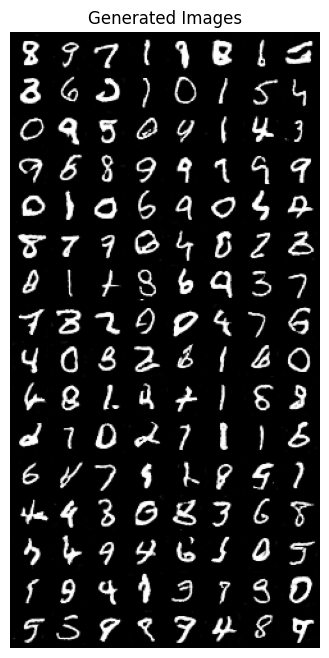

Epoch [42/50]  Loss D: 0.3618 , loss G: 1.2014
Epoch [43/50]  Loss D: 0.3943 , loss G: 2.3068
Epoch [44/50]  Loss D: 0.2881 , loss G: 3.7332
Epoch [45/50]  Loss D: 0.3274 , loss G: 1.5445
Epoch [46/50]  Loss D: 0.2897 , loss G: 1.7299
Epoch [47/50]  Loss D: 0.3187 , loss G: 2.4858
Epoch [48/50]  Loss D: 0.3261 , loss G: 1.8136
Epoch [49/50]  Loss D: 0.2950 , loss G: 2.4311
Epoch [50/50]  Loss D: 0.3388 , loss G: 1.9626


In [12]:
for epoch in range(epochs):
    for batch_idx , (real,_) in enumerate (loader):
        real = real.to(DEVICE)
        batch_size = real.size(0)

        ### Train Discriminator : max log(D(x)) + log(1-D(G(z)))
        noise = torch.randn(batch_size , z_dim ,1,1).to(DEVICE)
        fake = gen(noise)

        disc_real = disc(real).reshape(-1)
        lossD_real = criterion(disc_real , torch.ones_like(disc_real))

        disc_fake = disc(fake.detach()).reshape(-1)
        lossD_fake = criterion(disc_fake , torch.zeros_like(disc_fake))

        lossD = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward()
        opt_disc.step()

        ### Train Generator : min log(1-D(G(z))) <-> max log(D(G(z)))
        output = disc(fake).reshape(-1)
        lossG = criterion(output , torch.ones_like(output))

        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

    print(f"Epoch [{epoch+1}/{epochs}]  Loss D: {lossD:.4f} , loss G: {lossG:.4f}")

    if epoch % 10 == 0:
        with torch.no_grad():
            fake = gen(fixed_noise).detach().cpu()
        plt.figure(figsize=(8,8))
        plt.axis("off")
        plt.title("Generated Images")
        plt.imshow(
            np.transpose(
                torchvision.utils.make_grid(fake, padding=2, normalize=True),(1,2,0)
            )
        )
        plt.show()

## Visualization 

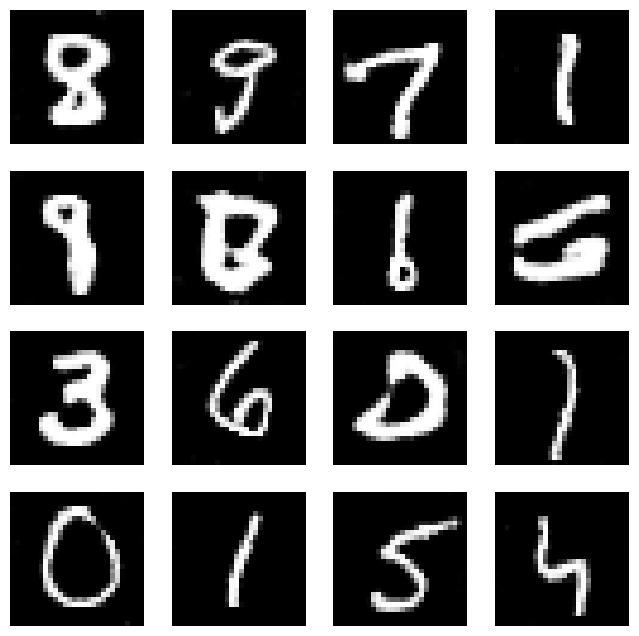

In [13]:
with torch.no_grad():
    fake_display = gen(fixed_noise).detach().cpu()
    plt.figure(figsize=(8,8))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(fake_display[i][0], cmap='gray')
        plt.axis('off')
    plt.show()